 # PDA definition and testing
 
 You may wish to watch this Youtube and then play with
 various PDA defined in this notebook
 

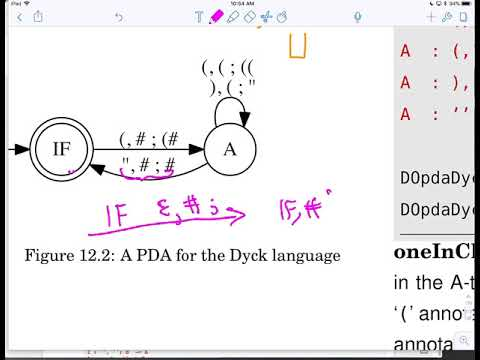

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('cvVl1lQ4agU')

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

#---- Leave these definitions ON if running on laptop
#---- Else turn OFF by putting them between ''' ... '''

sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                 '../../../..',  '../../../../3rdparty',  
                 '../../..',     '../../../3rdparty', 
                 '../..',        '../../3rdparty',
		 '..',           '../3rdparty' ]

from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc      import *
from jove.Def_PDA        import *
 
#---- Turn these definitions ON if running on COLAB by removing ''' ... '''
#---- Else leave them OFF

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')

from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc      import *
from jove.Def_PDA        import *
 
#display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
'''

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



 


You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



'\n! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi\nimport sys\nsys.path.append(\'./Jove\')\nsys.path.append(\'./Jove/jove\')\n\nfrom jove.SystemImports import *\nfrom jove.DotBashers    import *\nfrom jove.Def_md2mc      import *\nfrom jove.Def_PDA        import *\n \n#display(HTML(\'<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>\'))\n'

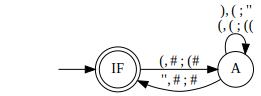

In [3]:
pdaDyck = md2mc('''PDA
IF : (, #; (# -> A
A  : (, (; (( -> A
A  : ), (; '' -> A
A  : '',#; #  -> IF
''')
DOpdaDyck = dotObj_pda(pdaDyck, FuseEdges=True)
DOpdaDyck

In [4]:
explore_pda("", pdaDyck)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [5]:
explore_pda("()", pdaDyck)

String () accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()', '#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [ ]:
explore_pda("()()(())", pdaDyck)

In [ ]:
explore_pda("()()(()", pdaDyck)  

In [ ]:
pda1 = md2mc('''PDA
I : a, b; c -> F
''')
DOpda1 = dotObj_pda(pda1, FuseEdges=True)
DOpda1

In [ ]:
pda2 = md2mc('''PDA
I : a, b  ; c  -> F
I : '', ''; d  -> A
A : '', d ; '' -> F
''')
DOpda2 = dotObj_pda(pda2, FuseEdges=True)
DOpda2

In [ ]:
explore_pda("a", pda1)

In [ ]:
explore_pda("a", pda2)

In [ ]:
pda3 = md2mc('''PDA
I : a, b  ; c  -> F
I : '', ''; d  -> A
A : a, d ; '' -> F
''')
DOpda3 = dotObj_pda(pda3, FuseEdges=True)
DOpda3

In [ ]:
explore_pda("a", pda3)

In [ ]:
pda4 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : a, d ; '' -> F
''')
DOpda4 = dotObj_pda(pda4, FuseEdges=True)
DOpda4

In [ ]:
explore_pda("a", pda4)

In [ ]:
pda5 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : '', ''; '' -> A
A : a, d ; '' -> F
''')
DOpda5 = dotObj_pda(pda5, FuseEdges=True)
DOpda5

In [ ]:
explore_pda("a", pda5)

In [ ]:
pda6 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : '', ''; z  -> A
A : '', z ; '' -> B
B : '', z ; '' -> C
C : '', z ; '' -> C
C : '', # ; '' | a, d; '' -> F
A : a, d ; ''  -> F
''')
DOpda6 = dotObj_pda(pda6, FuseEdges=True)
DOpda6

In [ ]:
explore_pda("a", pda6)

In [ ]:
explore_pda("a", pda6, chatty=True)

In [ ]:
explore_pda("a", pda6, STKMAX = 6, chatty=True)

In [ ]:
f27sip = md2mc('''PDA 
!!---------------------------------------------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's in the middle
!! thus matching either a^m b^m c^n or a^m b^n c^m
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq1    : '' , ''  ; $     -> q2       !!  start in init state by pushing a $

q2     : a  , ''  ; a     -> q2       !!  stack a's
q2     : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)

q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , $   ; ''    -> fq4      !!  hope for acceptance when $ surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
                                      !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , $   ; ''    -> fq7      !!  when $ surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
                                      !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering PDAs.
!!
!! State : i1 , si1 ; sp1 | i2 , si2 ; sp2 -> tos1, tos2 !! comment
!!
!! ..    : .. , ..  ; ..  | .. , ..  ; ..  -> ..  , ..   !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------

''')


In [ ]:
Dof27sip = dotObj_pda(f27sip, FuseEdges=True)
Dof27sip

In [ ]:
explore_pda("aaabbbccc", f27sip)

In [ ]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [ ]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [ ]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=8)

In [ ]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [ ]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [ ]:
explore_pda("3+3+2+2*3+2*3", pdaE, STKMAX=5)

In [ ]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=5)

In [ ]:
explore_pda("3*~2*3+~2*3+3+~2+3*~2", pdaE, STKMAX=13)